## 5.1 인슐린 수치를 에측하기위해 데이터 셋 나누기

In [1]:
#라이브러리
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt

In [2]:
df = pd.read_csv('./Data/diabetes.csv')
df.shape

(768, 9)

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
## 학습, 예측 데이터셋 나누기
(df['Insulin']>0).value_counts()

True     394
False    374
Name: Insulin, dtype: int64

In [6]:
train = df[df['Insulin']>0].copy()
train.shape

(394, 9)

In [8]:
test = df[df['Insulin']==0].copy()
test.shape

(374, 9)

In [12]:
##학습, 예측에 사용할 컬럼
df.columns
feature_names = df.columns.tolist()
feature_names.remove('Insulin')
feature_names

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [13]:
#예측할 값 정하기
label_name = 'Insulin'
label_name

'Insulin'

In [14]:
#학습데이터와 예측 데이터 나누기
X_train = train[feature_names]
X_train.shape

(394, 8)

In [15]:
y_train =train[label_name]
y_train.shape

(394,)

In [20]:
#예측데이터
X_test = test[feature_names]
X_test.shape

(374, 8)

In [18]:
y_test= test[label_name]
y_test.shape

(374,)

#### 머신러닝 알고리즘 가져오기

In [22]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state = 42)
model

DecisionTreeRegressor(random_state=42)

In [24]:
model.fit(X_train,y_train)

DecisionTreeRegressor(random_state=42)

In [27]:
#Cross Validation으로 학습세트의 오차를 측정한다.

from sklearn.model_selection import cross_val_predict

y_predict  = cross_val_predict(model, X_train, y_train, cv=5, verbose = 2, n_jobs =-1)
y_predict[:10]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished


array([ 25., 480.,  55., 145., 495., 130., 220., 285., 176., 155.])

 - cv : 테스트를 몇번 반복할지 
     - cv가 많으면 많을수록 시간이 오래걸리지만 정확도가 높아진다
     
 - verbose : 로그를 표시할지 말지
 

In [28]:
#정답을 정확하게 맞추 개수
(y_predict == y_train).sum()

3

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Insulin'>

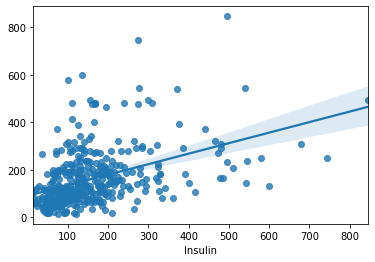

In [30]:
sns.regplot(y_train, y_predict)
#200미만의 값은 예측을 잘 했지만 200 이상의 값들은 실제값과 예측값의 차이가 크다
#기울기로 보면 된다.

In [32]:
from sklearn.metrics import r2_score
r2_score(y_train, y_predict)
#회귀가 잘 되었는지 측정하는 함수
#1에 가까워야 잘 예측한 것이다.

-0.14429295602725567

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Insulin', ylabel='Density'>

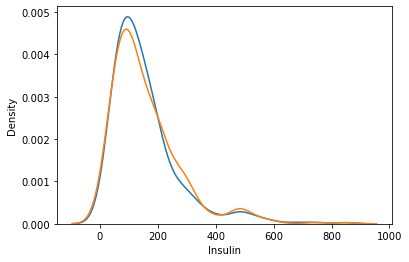

In [34]:
sns.distplot(y_train,hist = False, label ='train')
sns.distplot(y_predict , hist = False,label ='test')

#### MAE = Mean absolutely Error

In [35]:
error = abs(y_train- y_predict)
error.mean()

86.57106598984771

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Insulin', ylabel='Density'>

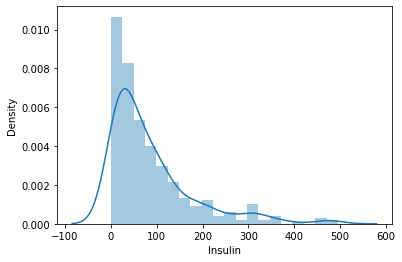

In [36]:
sns.distplot(error)

In [37]:
error.describe()

count    394.000000
mean      86.571066
std       92.896321
min        0.000000
25%       22.250000
50%       55.000000
75%      115.000000
max      495.000000
Name: Insulin, dtype: float64

#### RMSE = Root Mean Squart Error